# SWMAL Exercise


## Performance Metrics

There are a number of frequently uses metrics in ML, namely accuracy, precision, recall and the $F_1$ score. All are called _metrics_ (though they are not true norms, like ${\cal L}_2$ or ${\cal L}_1$ we saw last time).

Maybe performance _score_ would be a better name than performance metric, at least for the accuracy, precision, recall we will be looking at---emphasising the conceptual distinction between the  _score-function_ and _cost(/loss/error/objective)-function_ (the later is typically a true distance/norm function).  

### Nomenclature

| NAME | SYMBOL | ALIAS |
| :---: | :---: | :---: |
|true positives | $TP$ | |
|true negatives | $TN$ | |
|false positives| $FP$ | type I error| 
|false negatives| $FN$ | type II error |

and $N = N_P + N_N$ being the total number of samples and the number of positive and negative samples
respectively.

### Precision

$$
\def\by{\mathbf{y}}
\def\ba{\begin{array}{lll}}
\def\ea{\end{array}}
\newcommand{\rem}[1]{}
\newcommand\st[1]{_{\scriptsize #1}}
\newcommand\myfrac[2]{\frac{#1\rule{0pt}{8pt}}{#2\rule{0pt}{8pt}}} 
\ba
 p &= \myfrac{TP}{TP + FP}
\ea
$$

### Recall or Sensitivity

$$
  \ba
    r &= \myfrac{TP}{TP + FN}\\
      &= \myfrac{TP}{N_P}
  \ea
$$

### Accuracy

$$
  \ba
      a &= \myfrac{TP + TN}{TP + TN + FP + FN}\\
        &= \myfrac{TP + TN}{N}\\
        &= \myfrac{TP + TN}{N_P~~ + N_N} 
  \ea
$$

#### Accuracy Paradox

A static constant model, say $p\st{cancer}=0$ may have higher accuracy than a real model with predictive power. This is odd!

Asymmetric weights could also be associated with the false positive and false negative predictions, yielding either FP of FN much more expensive than the other. Say, it is more expensive not to treat a person with cancer, than treating a person without cancer. 

### F-score

General $\beta$-harmonic mean of the precision and recall 
$$
    F_\beta = (1+\beta^2) \myfrac{pr}{\beta^2 p+r}\\
$$ 
that for say $\beta=2$ or $\beta=0.5$ shifts or skews the emphasis on the two variables in the equation. Normally only the $\beta=1$ harmonic mean is used

$$
  \ba
    F_1 &= \myfrac{2pr}{p+r}\\
        &= \myfrac{2}{1/p + 1/r}
  \ea
$$
with $F$ typically being synonymous with $F_1$. 


## Confusion Matrix

For statistical classification, the confusion matrix or error matrix (or
matching matrix in unsupervised learning) is for a two-class problem given by
the $2\times2$ matrix with dimensions 'actual' and 'predicted'

$$   
{\bf M}\st{confusion} = 
\begin{array}{l|ll}
                           & \mbox{actual true} & \mbox{actual false} \\ \hline
    \mbox{predicted true}  & TP & FP \\     
    \mbox{predicted false} & FN & TN 
\end{array}
$$

The diagonal, in the square matrix, represent predicted values being the same
as the actual values, off-diagonal elements represent erroneous prediction.

Also notice, that the layout of this matrix is different of what is given in [HOML], "Confusion Matrix", p.110/fig 3-3. This is just a minor issue, since we can always flip/rotate/transpose the matrix (say by flipping the $\by\st{true}$ and $\by\st{pred}$ arguments). 

For N-class classification the matrix gives a matrix with $N$ actual
classes and $N$ predicted classes

$$
{\bf M}\st{confusion}~~~ =
  \left[
  \begin{array}{llll}
       c_{11} & c_{12} & \cdots & c_{1n} \\ 
       c_{21} & c_{22} & \cdots & c_{2n} \\
       \vdots & \vdots & \ddots & \vdots \\
       c_{n1} & c_{n2} & \cdots & c_{nn} \\ 
  \end{array}
  \right]
$$
with say element $c_{21}$ being the number of actual classes '1' being predicted (erroneously) as class '2'.

### Nomenclature for the Confusion Matrix

The naming of the elements in the confusion matrix can be rather exotic, like _false omission rate_ (see the figure below), but we won't get to such detail here...let us stick with TP, TN, FP, FN and $F_1$!

<img src="https://itundervisning.ase.au.dk/SWMAL/L02/Figs/performance_metrics.jpg" alt="WARNING: could not get image from server" style="width:900px">

#### Qa Implement the Accuracy function and test it on the MNIST data.

We now follow the convention in Scikit-learn, that a score funtion takes the arguments `y_true` and then `y_pred`

```
    sklearn.metrics.accuracy_score(y_true, y_pred, ..)
```

We implement a general accuracy function `MyAccuracy(y_true, y_pred)`. Again, we implement the function ourselfies from scratch, like we do not use any helper functions from Scikit-learn.

We reuse our MNIST data loader and test the `MyAccuracy` function both on our dummy classifier and on the Stochastic Gradient Descent classifier.

We compare our accuracy score with the acutal value from `sklearn.metrics.accuracy_score()`.

In [3]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

from sklearn.datasets import fetch_openml

# Get data set 
def MNIST_GetDataSet():
    X,y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame = False, parser = 'auto')
    X = X / 255.
    return X,y

X,y = MNIST_GetDataSet()
X = X / 255.

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create binary classifier for the target y_train_5 with 5 as the true digit
y_train_5 = (y_train == '5')
y_test_5  = (y_test == '5')

# Create SGD classifier
sgd_clf = SGDClassifier(random_state=42)

# Train using training data
sgd_clf.fit(X_train, y_train_5)

# Predict using test data
y_pred = sgd_clf.predict(X_test)

from sklearn.metrics import accuracy_score

class DummyClassifier():
    def __init__(self):
        self.classes_ = None
        self.dummy_class_ = None

    def fit(self, X, y=None):
        self.classes_ = np.unique(y)
        self.dummy_class_ = np.argmax(np.bincount(y))
        return self
    
    def predict(self, X):
        return np.full(X.shape[0], fill_value=self.dummy_class_)
    
dummyClassifier = DummyClassifier()
dummyClassifier.fit(X_train, y_train_5)
y_pred_dummy = dummyClassifier.predict(X_train)


In [6]:
from sklearn.metrics import accuracy_score

def MyAccuracy(y_true, y_pred):
    if len(y_true) == 0 or len(y_pred) == 0:
        return 0
    y_pred_correct=[]
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            y_pred_correct.append(y_pred[i])
    return len(y_pred_correct)/len(y_true)
    
# TEST FUNCTION: example of a comperator, using Scikit-learn accuracy_score
def TestAccuracy(y_true, y_pred):
    a0=MyAccuracy(y_true, y_pred)
    a1=accuracy_score(y_true, y_pred)

    print(f"\nmy a          ={a0}")
    print(f"scikit-learn a={a1}")

print("\nTestAccuracy() simple example:")
TestAccuracy([1,2,3,4], [1,2,3,3])

print("\nTestAccuracy() on sdg:")
TestAccuracy(y_test_5, y_pred)
print("\nTestAccuracy() on dummy:")
TestAccuracy(y_train_5, y_pred_dummy)



TestAccuracy() simple example:

my a          =0.75
scikit-learn a=0.75

TestAccuracy() on sdg:

my a          =0.9117142857142857
scikit-learn a=0.9117142857142857

TestAccuracy() on dummy:

my a          =0.9093392857142857
scikit-learn a=0.9093392857142857


#### Qb Implement Precision, Recall and $F_1$-score and test it on the MNIST data for both the SGD and Dummy classifier models

Next we implement the `MyPrecision`, `MyRecall` and `MyF1Score` functions, were we are using MNIST as input, with the SGD and the Dummy classifiers and make some test vectors to compare to the functions found in Scikit-learn.

In [8]:
import sklearn.metrics as metrics

def MyPrecision(y_true, y_pred):
    pcp = [item for item in y_pred if item == True]
    if len(pcp)==0:
        return 0
    y_predCorrect=[]
    for i in range(len(y_true)):
        if y_true[i]==True and y_pred[i]==True:
            y_predCorrect.append(y_pred[i])
    return len(y_predCorrect)/len(pcp)

def MyPrecision_Test(y_true, y_pred):
    if len(y_true) != len(y_pred):
      print("Error: Input arrays have different lengths.")
      return
    precision=MyPrecision(y_true, y_pred)
    precision_scikit=metrics.precision_score(y_true, y_pred, zero_division = 0.0)

    print(f"\nprecision = {precision}")
    print(f"precision_scikit = {precision_scikit}")

print("\nMyPrecision_Test() simple example:")
MyPrecision_Test([True,True,False,True], [True,True,True,False])
print("\nMyPrecision_Test() on y_pred:")
MyPrecision_Test(y_test_5, y_pred)
print("\nMyPrecision_Test() on y_pred_dummy:")
MyPrecision_Test(y_train_5, y_pred_dummy)

def MyRecall(y_true, y_pred):
     #condition positive
    cp = [item for item in y_true if item == True]
    y_predCorrect=[]
    for i in range(len(y_true)):
        if y_true[i]==True and y_pred[i]==True:
            y_predCorrect.append(y_pred[i])
    return len(y_predCorrect)/len(cp)

def MyRecall_Test(y_true, y_pred):
    if len(y_true) != len(y_pred):
      print("Error: Input arrays have different lengths.")
      return
    recall=MyRecall(y_true, y_pred)
    recall_scikit=metrics.recall_score(y_true, y_pred)

    print(f"\nrecall = {recall}")
    print(f"recall_scikit = {recall_scikit}")

print("\nMyRecall_Test() usage example:")
MyRecall_Test([True,True,True,True], [True,True,True,False])
print("\nMyRecall_Test() on y_pred:")
MyRecall_Test(y_test_5, y_pred)
print("\nMyRecall_Test() on y_pred_dummy:")
MyRecall_Test(y_train_5, y_pred_dummy)

def MyF1Score(y_true, y_pred):
    p = MyPrecision(y_true, y_pred)
    r = MyRecall(y_true, y_pred)
    if p==0 or r==0:
        return 0
    return 2/((1/p)+(1/r))

def F1Score_Test(y_true, y_pred):
    if len(y_true) != len(y_pred):
      print("Error: Input arrays have different lengths.")
      return
    f1Score=MyF1Score(y_true, y_pred)
    f1Score_scikit=metrics.f1_score(y_true, y_pred)

    print(f"\nf1Score = {f1Score}")
    print(f"f1Score_scikit={f1Score_scikit}")

print("\nF1Score_Test() simple example:")
F1Score_Test([True,True,False,True], [True,False,True,False])
print("\nF1Score_Test() on y_pred:")
F1Score_Test(y_test_5, y_pred)
print("\nF1Score_Test() on y_pred_dummy:")
F1Score_Test(y_train_5, y_pred_dummy)


MyPrecision_Test() simple example:

precision = 0.6666666666666666
precision_scikit = 0.6666666666666666

MyPrecision_Test() on y_pred:

precision = 0
precision_scikit = 0.0

MyPrecision_Test() on y_pred_dummy:

precision = 0
precision_scikit = 0.0

MyRecall_Test() usage example:

recall = 0.75
recall_scikit = 0.75

MyRecall_Test() on y_pred:

recall = 0.0
recall_scikit = 0.0

MyRecall_Test() on y_pred_dummy:

recall = 0.0
recall_scikit = 0.0

F1Score_Test() simple example:

f1Score = 0.4
f1Score_scikit=0.4

F1Score_Test() on y_pred:

f1Score = 0
f1Score_scikit=0.0

F1Score_Test() on y_pred_dummy:

f1Score = 0
f1Score_scikit=0.0


#### Qc The Confusion Matrix

Then we take a look back at ouryour solution to Qb in the `dummy_classifier.ipynb`. 
We generate the confusion matrices for both the Dummy and the SGD classifier using the `scklearn.metrics.confusion_matrix` function. 

In [10]:
from sklearn.metrics import confusion_matrix
cm_sdg = confusion_matrix(y_test_5, y_pred)
cm_sdg_reversed = confusion_matrix(y_pred, y_test_5)
cm_dummy = confusion_matrix(y_train_5, y_pred_dummy)

print(f"sdg: \n{cm_sdg}\n")
print(f"dummy: \n{cm_dummy}\n")
print(f"sdg reversed: \n{cm_sdg_reversed}\n")

sdg: 
[[12764     0]
 [ 1236     0]]

dummy: 
[[50923     0]
 [ 5077     0]]

sdg reversed: 
[[12764  1236]
 [    0     0]]



#### Qd A Confusion Matrix Heat-map

Now its time to get lit, by generating a _heat map_ image for the confusion matrices, `M_dummy` and `M_SGD`. 
Inspiration taken from [HOML] "Error Analysis", pp.122-125.

This heat map could be an important guide for us when analysing multiclass data in the future.

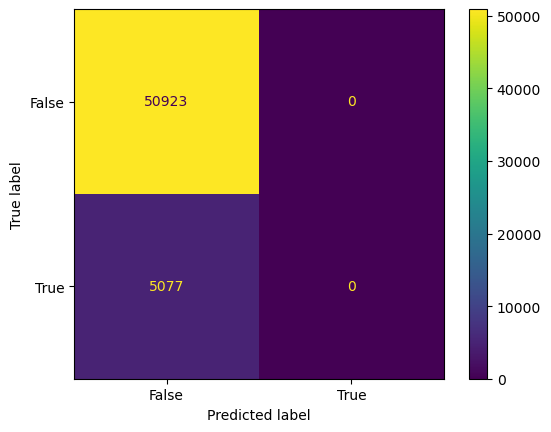

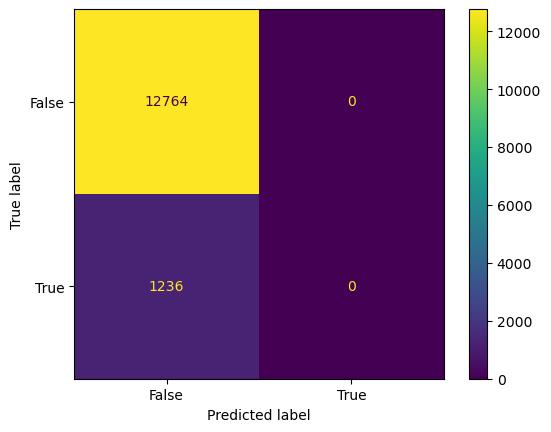

In [13]:
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

plt.rc('font', size=10) 
ConfusionMatrixDisplay.from_predictions(y_train_5,y_pred_dummy) 
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test_5,y_pred)
plt.show()

### Qe Conclusion

Now, conclude on all the exercise above. 

Write a short textual conclusion (max. 10- to 20-lines) that extract the _essence_ of the exercises: why did you think it was important to look at these particular ML concepts, and what was our overall learning outcome of the exercises (in broad terms).

In this exercise, we did an evaluation of classification algorithms using custom Python metrics as well as the functions provided by scikit-learn.
The primary objective of this exercise was to emphasize the significance of utilizing specific metrics when evaluating your algorithm, as the choice of metrics should align with the particular use case. For instance, in the context of identifying criminals, prioritizing high precision is crucial, while for disease detection, a high recall or sensitivity is more pertinent. Additionally, the F1-score proves useful when you need to strike a balance between true positives and true negatives, making it especially relevant, as seen in the "is this a 5?" algorithm. Consequently, the F1-score offers a more precise assessment of the utility of both the SGD algorithm and the Dummy classifier, with their respective accuracy rates of approximately 75% and 0%.

Moreover, we employed confusion matrices and heatmaps to gain in-depth insights into the performance of these classifiers, providing a visually informative component to complement the quantitative metrics.
